# Analysing Time Series Data in Pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## 2.1 Creating Time Series Index in Pandas

In [2]:
time_index_daily = pd.date_range('2021-01-01', '2021-12-31', freq='D')
print(time_index_daily)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')


In [3]:
time_index_weekly = pd.date_range('2021-01-01', '2021-12-31', freq='W')
print(time_index_weekly)

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
               '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05',
               '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03',
               '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
               '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
               '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26'],
              dtype='datetime64[ns]', freq='W-SUN')


In [4]:
time_index_monthly = pd.date_range('2021-01-01', '2021-12-01', freq="MS")
print(time_index_monthly)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')


## 2.2 Creating Time Series White Noise Data

Consider a time series $\{w_t, t = 1, 2, ..., n\}$. If the element of the series
wi are independent and identically distributed, with a mean of zero, and
no correlation to each other, then we say the time series is white noise.
In the task, you will create a dataframe called df, with two columns,
“Date” and “Noise”. “Date” column is timestamp from 2021-01-01 to
2021-12-31, with time interval as day. “Noise” column is white noise
data, with mean of 0 and standard deviation of 1 (hint: for white noise
data, you can use numpy or random function). 

In [5]:
white_noise = pd.DataFrame({
    'Date' : time_index_daily,
    'Noise': np.random.randn(len(time_index_daily))
})
white_noise

,Date,Noise
0,2021-01-01,-0.115121
1,2021-01-02,0.526294
2,2021-01-03,0.725855
3,2021-01-04,0.147996
4,2021-01-05,-2.122324
...,...,...
360,2021-12-27,-1.173277
361,2021-12-28,0.799812
362,2021-12-29,0.478784
363,2021-12-30,0.244155


<AxesSubplot:xlabel='Date'>

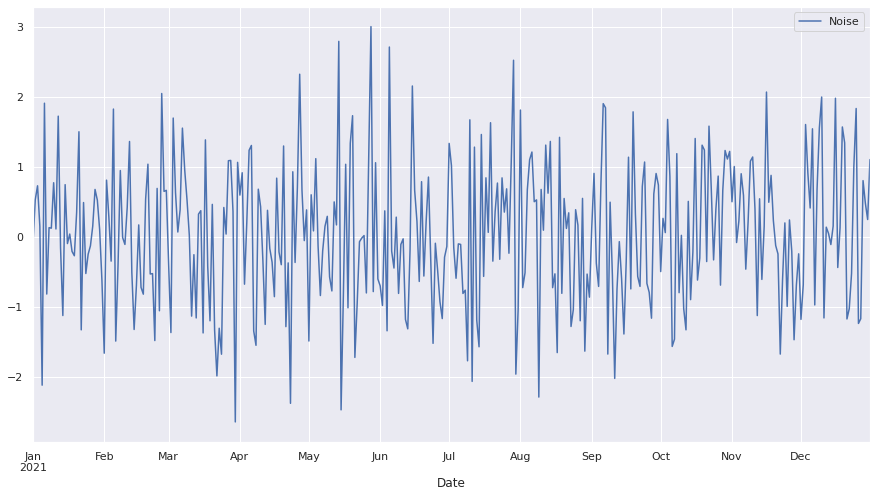

In [6]:
white_noise.plot(x='Date', y='Noise', figsize=(15, 8))

## 2.3 Simulating Time Series Random Walk
A random walk is another time series model where the current
observation is equal to the previous observation with a random step up
or down.
$$
x_t = x_{t−1} + w_t \text{, where $w_t$ is white noise}
$$
In this task, you are going to simulate stock price. The date range is
from 2021-01-01 to 2021-12-31, with day as frequency. The stock price
starts from 100 on day 1, and you will simulate the stock price using
random walk. 

In [7]:
white_noise

,Date,Noise
0,2021-01-01,-0.115121
1,2021-01-02,0.526294
2,2021-01-03,0.725855
3,2021-01-04,0.147996
4,2021-01-05,-2.122324
...,...,...
360,2021-12-27,-1.173277
361,2021-12-28,0.799812
362,2021-12-29,0.478784
363,2021-12-30,0.244155


In [8]:
stock_prices = [100]

for t in range(1, len(time_index_daily)):
    x_t = stock_prices[t - 1] + np.random.randn()
    stock_prices.append(x_t)

stocks = pd.DataFrame({
    'Date' : time_index_daily,
    'Stock' : stock_prices
})

stocks

,Date,Stock
0,2021-01-01,100.000000
1,2021-01-02,99.416196
2,2021-01-03,100.019326
3,2021-01-04,100.697555
4,2021-01-05,101.919910
...,...,...
360,2021-12-27,91.069340
361,2021-12-28,92.307855
362,2021-12-29,92.603379
363,2021-12-30,91.484451


<AxesSubplot:xlabel='Date'>

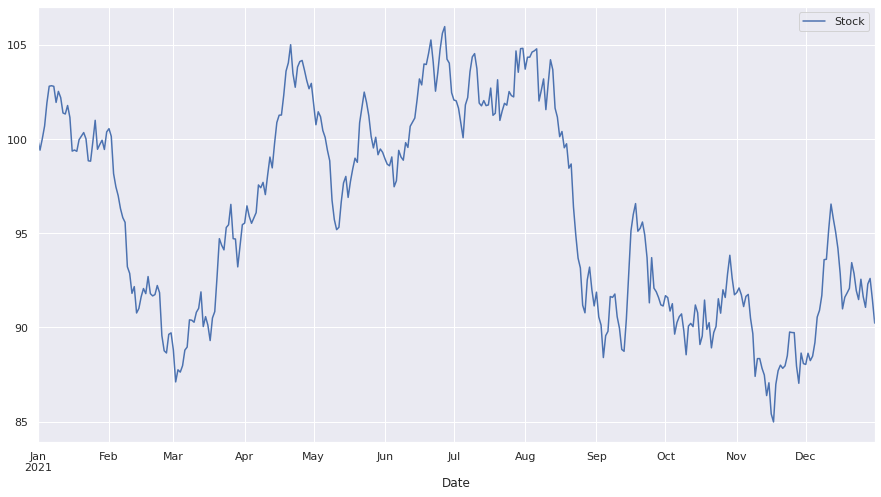

In [9]:
stocks.plot(x='Date', y='Stock', figsize=(15, 8))

## 2.4 Summarising Time Series Data

In this task, you will use the dataset BikeSharing.csv. You are provided
hourly bike rental data spanning two years. The description of data fields
are as below:

**dteday** - hourly date + timestamp

**season** - 1 = spring, 2 = summer, 3 = fall, 4 = winter

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather** - 1: Clear, 2: Mist + Cloudy, 3: Light Snow + Light Rain, 4:
Heavy Rain

**temp** – normalized temperature in Celsius

**atemp** - normalized "feels like" temperature in Celsius

**humidity** – normalized relative humidity

**windspeed** – normalized wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of total rentals

you are going to manipulate this time series data with Pandas function,
and answer the following questions in order to extract useful insights.

1. Compute the monthly average temperature.
2. Compute the daily sum of casual, register and total rentals.
3. Compute the monthly sum of total rentals in different weathers.
4. What is the peak hours of bike rental for casual users and
registered users, respectively?


### Compute the Monthly Average Tempeature

In [10]:
bike_df = pd.read_csv("../../datasets/BikeSharing.csv", parse_dates=['dteday'], index_col='dteday')
bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,1,0,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,1,0,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [11]:
bike_df.resample('M')['temp'].mean()

dteday
2011-01-31    0.302894
2011-02-28    0.399908
2011-03-31    0.387596
2011-04-30    0.493565
2011-05-31    0.564361
2011-06-30    0.599749
2011-07-31    0.660863
2011-08-31    0.597918
2011-09-30    0.543839
2011-10-31    0.466541
2011-11-30    0.445498
2011-12-31    0.388157
2012-01-31    0.374186
2012-02-29    0.406570
2012-03-31    0.503441
2012-04-30    0.499000
2012-05-31    0.587581
2012-06-30    0.614492
2012-07-31    0.645618
2012-08-31    0.625061
2012-09-30    0.549917
2012-10-31    0.494993
2012-11-30    0.381785
2012-12-31    0.367871
Freq: M, Name: temp, dtype: float64

### Compute the daily sum of casual, register and total rentals.

In [12]:
bike_df.resample('D')[['casual', 'registered', 'cnt']].sum()

,casual,registered,cnt
dteday,,,
2011-01-01,331,654,985
2011-01-02,47,1313,1360
2011-01-03,137,1714,1851
2011-01-04,307,1920,2227
2011-01-05,1138,2213,3351
...,...,...,...
2012-12-27,247,1867,2114
2012-12-28,644,2451,3095
2012-12-29,159,1182,1341


### Compute the monthly sum of total rentals in different weathers.

In [13]:
bike_df.groupby('weather').resample('M')['cnt'].sum()

weather  dteday    
1        2011-01-31    41949
         2011-02-28    50050
         2011-03-31    52195
         2011-04-30    77363
         2011-05-31    90190
                       ...  
4        2012-05-31        0
         2012-06-30        0
         2012-07-31        0
         2012-08-31        0
         2012-09-30      164
Name: cnt, Length: 93, dtype: int64

### What is the peak hours of bike rental for casual users and registered users, respectively?

In [14]:
bike_df.groupby(bike_df.index.hour).mean().nlargest(1, 'casual')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
14,2.496571,0.028807,0.683128,1.433471,0.565075,0.534188,0.496982,0.232462,75.567901,165.381344,240.949246


In [15]:
bike_df.groupby(bike_df.index.hour).mean().nlargest(1, 'registered')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
17,2.494521,0.028767,0.683562,1.409589,0.554575,0.523224,0.513438,0.233371,74.273973,387.178082,461.452055


# Analysing Time Series Data with Statsmodels

## 3.1 Checking on Time Series Stationarity

Time series are stationary if they do not have trend or seasonal effects.
Summary statistics calculated on the time series are consistent over
time, like the mean or the variance of the observations. Load the two
datasets daily-total-female-births.csv and AirPassengers.csv, and
use the multiple methods to check whether the datasets are stationary.


In [16]:
births_df = pd.read_csv('../../datasets/daily-total-female-births.csv', parse_dates =['Date'], index_col ='Date')
births_df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [17]:
air_df = pd.read_csv('../../datasets/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
air_df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Visual Inspection of Graphs

#### Daily Female Births

<AxesSubplot:xlabel='Date'>

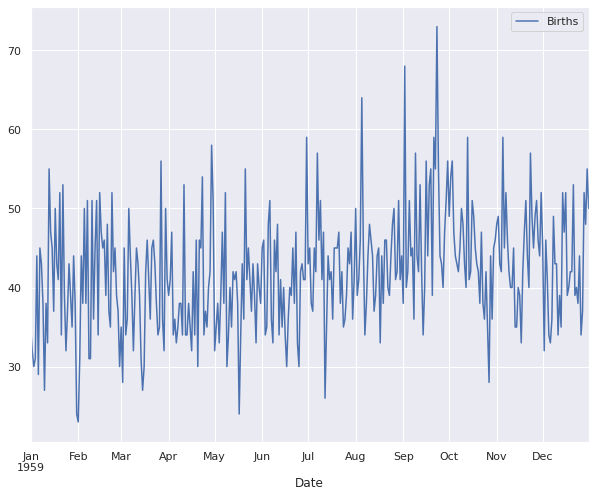

In [18]:
births_df.plot(figsize=(10, 8))

- There is no clear trend in the time series data.
- We observe that the time series appears to be stationary, as the mean and variance of the data appears to be mostly constant

#### Air Passengers

<AxesSubplot:xlabel='Month'>

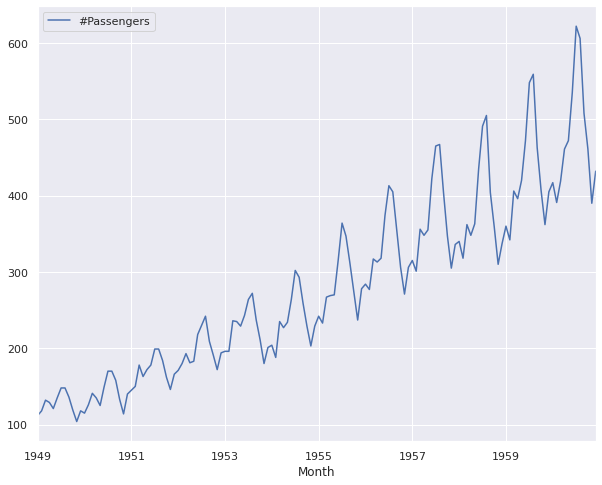

In [19]:
air_df.plot(figsize=(10, 8))

- There is a clear upward trend over time
- We see that the mean and variance increases over time, hence the data does not appear to be stationary.

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

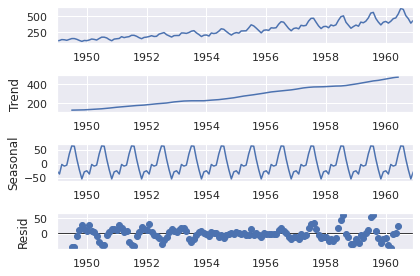

In [76]:
seasonal_decompose(air_df, 'additive').plot()
plt.show()

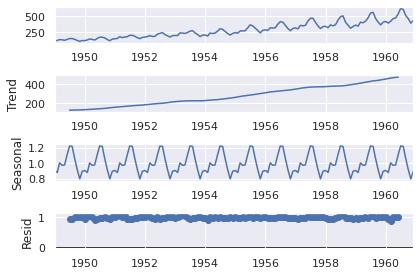

In [77]:
seasonal_decompose(air_df, 'multiplicative').plot()
plt.show()

### Summary Statistics

#### Female Births

array([[<AxesSubplot:title={'center':'Births'}>]], dtype=object)

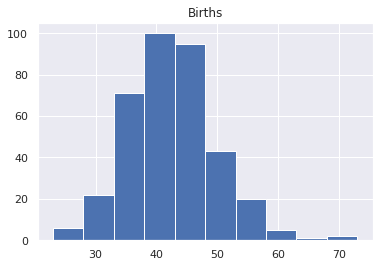

In [20]:
births_df.hist()

- The data appears to follow a gaussian distribution, hence is likely to be stationary.

In [21]:
grp1 = births_df[:len(births_df) // 2]
grp2 = births_df[len(births_df)//2:]

In [22]:
pd.concat([grp1.describe(), grp2.describe()], axis=1)

,Births,Births
count,182.000000,183.000000
mean,39.763736,44.185792
std,7.034579,6.998306
min,23.000000,26.000000
25%,34.250000,40.000000
50%,39.000000,44.000000
75%,45.000000,48.000000
max,59.000000,73.000000


- The mean and standard deviations of the two groups are similar

#### Air Passengers

array([[<AxesSubplot:title={'center':'#Passengers'}>]], dtype=object)

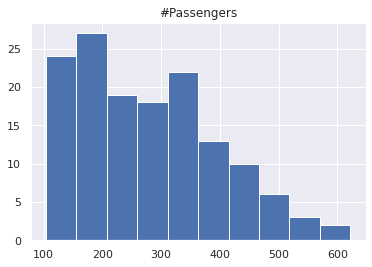

In [23]:
air_df.hist()

- The data does not appear to follow a gaussian distribution.

In [24]:
grp1 = air_df[:len(air_df) // 2]
grp2 = air_df[len(air_df)//2:]

In [25]:
pd.concat([grp1.describe(), grp2.describe()], axis=1)

,#Passengers,#Passengers
count,72.000000,72.000000
mean,182.902778,377.694444
std,47.704241,86.439206
min,104.000000,233.000000
25%,144.000000,314.500000
50%,180.000000,361.000000
75%,220.250000,420.500000
max,302.000000,622.000000


- The mean and variance of both groups are significantly different. This implies a non-stationary series.

### Statistical Tests

The Augmented Dickey-Fuller test is a type of statistical test called a
unit root test. The intuition behind a unit root test is that it determines how strongly a
time series is defined by a trend. The null hypothesis of the test is that
the time series can be represented by a unit root, that it is not stationary
(has some time-dependent structure). The alternate hypothesis
(rejecting the null hypothesis) is that the time series is stationary.


In [26]:
from statsmodels.tsa.stattools import adfuller
stat, p_value_births, *_ = adfuller(births_df)
stat, p_value_air, *_ =  adfuller(air_df)

In [27]:
print("Female Birth Dataset p-value:", p_value_births)
print("Air Passenger Dataset p-value:", p_value_air)

Female Birth Dataset p-value: 5.2434129901498554e-05
Air Passenger Dataset p-value: 0.991880243437641


## 3.2 Make the Time Series Stationary By Differencing

As we can see from the above stationarity test, the time series data
AirPassengers.csv is non-stationary. One way to make the time series
stationary is by differencing the time series.
Therefore, you are required to use Statsmodel function to difference
the time series data.
(Hint: from statsmodels.tsa.statespace.tools import diff)
After the differencing operation, you are required to run Augmented
Dickey-Fuller test to see whether the new time series is stationary. Also,
you should plot the time series before and after differencing operation.

In [28]:
from statsmodels.tsa.statespace.tools import diff

Air Passenger Before Differencing, p-value: 0.991880243437641
(Lag 2) Air Passenger After Differencing, p-value: 2.7328918500143186e-29


Text(0.5, 1.0, 'Time Series After Differencing')

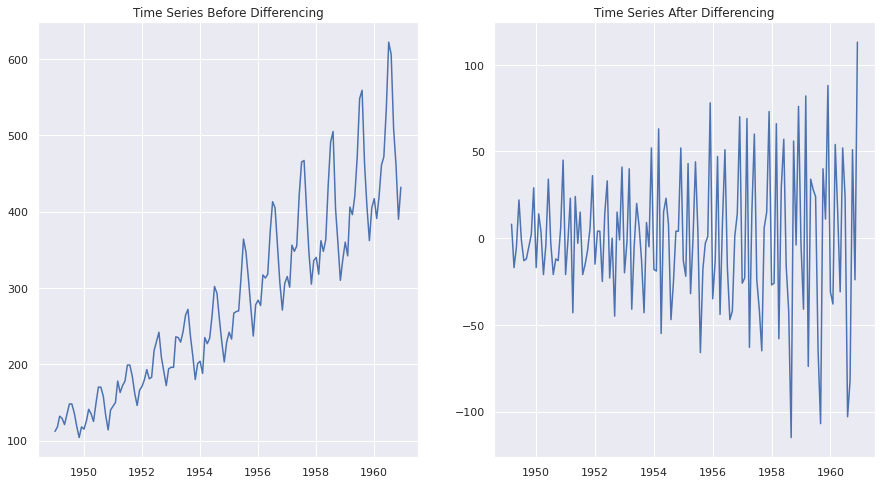

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(air_df)
ax[0].set_title("Time Series Before Differencing")
result = adfuller(air_df)
print("Air Passenger Before Differencing, p-value:", result[1])
for lag in range(1, 20):
    diff_df = diff(air_df, lag)
    result = adfuller(diff_df)
    if result[1] < 0.05:
        lagged_df = diff_df
        print(f"(Lag {lag}) Air Passenger After Differencing, p-value:", result[1])
        break
ax[1].plot(lagged_df)
ax[1].set_title("Time Series After Differencing")

## 4.1 Build a Simple Moving Average Model

In this task, you are required to build a simple moving average model
on the bikesharing.csv dataset. The purpose of the simple moving
average is to smooth the fluctuating time series data, in order to
visualize trends and generate insights.

1. Calculate the daily total bike rental (using groupby function)
2. Plot the daily total bike rental data, and see if you can identify any
trend or insights.
3. Produce a 7-day moving average and a 30-day moving average data
and plot on top of the daily total bike rental data. Can you see any trend and
insight this time?


In [30]:
daily_rentals = bike_df.resample('D')[['cnt']].sum()

<AxesSubplot:xlabel='dteday'>

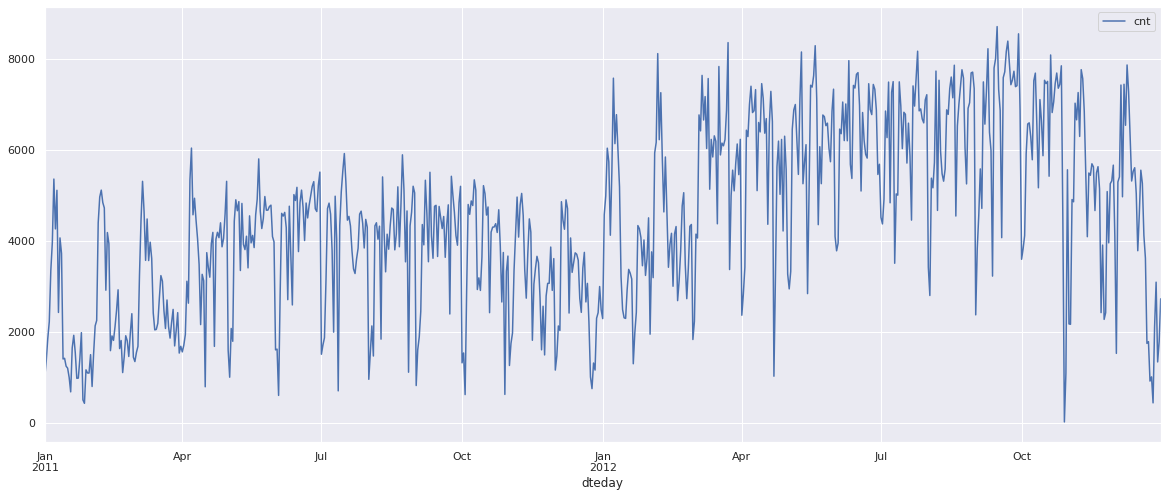

In [31]:
daily_rentals.plot(figsize=(20, 8))

- Upwards trend in bike Rentals

In [32]:
sma_7 = daily_rentals.rolling(window=7).mean()
sma_30 = daily_rentals.rolling(window=30).mean()

In [33]:
daily_rentals['SMA(7)'] = sma_7
daily_rentals['SMA(30'] = sma_30

<AxesSubplot:xlabel='dteday'>

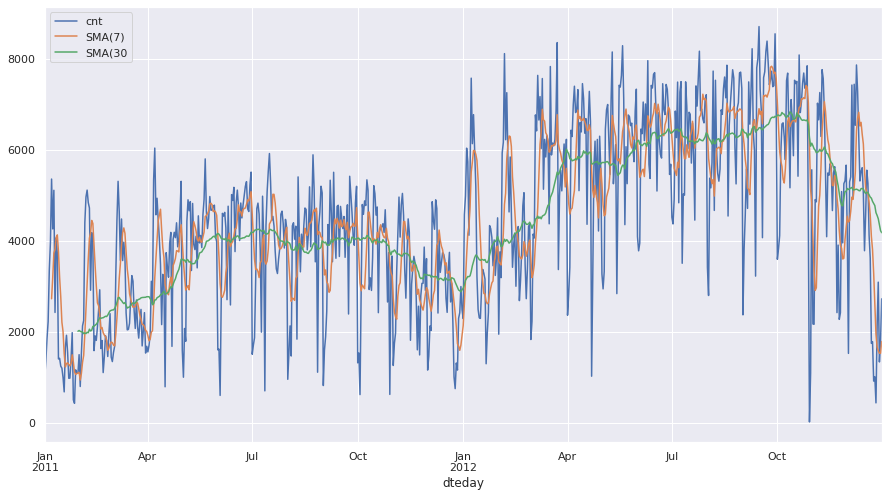

In [34]:
daily_rentals.plot(figsize=(15, 8))

## 4.2 Build Holt-Winters Exponential Smoothing Model

In this task, you are required to build a Holt-Winters exponential
smoothing model on the bikesharing.csv dataset. The model should be
able to capture historical data and predict future daily bike rental.
In order to verify the model accuracy, you should use data from 2011-
01-01 to 2012-10-31 as your training data, and data from 2012-11-01
to 2012-12-31 as testing data.
Using Holt-Winters exponential smoothing model, your output should
look similar to below:


In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [49]:
train = daily_rentals[:'2012-10-31']['cnt']
test = daily_rentals['2012-11-01':]['cnt']

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_percentage_error

In [67]:
initial_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=31).fit()

/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [56]:
daily_rentals['2012-11-01':]

,cnt,SMA(7),SMA(30
dteday,,,
2012-11-01,2177,4088.000000,6095.366667
2012-11-02,2169,3334.428571,6030.400000
2012-11-03,4911,2914.285714,5996.833333
2012-11-04,4862,2971.857143,5939.833333
2012-11-05,7030,3973.000000,5954.233333
...,...,...,...
2012-12-27,2114,1663.857143,4562.500000
2012-12-28,3095,1588.428571,4490.333333
2012-12-29,1341,1530.142857,4357.600000


In [69]:
forecasts = initial_model.predict(start='2012-11-01', end='2012-12-31')

In [58]:
forecasts

2012-11-01    4148.498609
2012-11-02    2554.220024
2012-11-03    2853.702478
2012-11-04    4219.359665
2012-11-05    4864.729991
                 ...     
2012-12-27    5757.266146
2012-12-28    5779.090857
2012-12-29    4257.532394
2012-12-30    2211.882801
2012-12-31    3307.862634
Freq: D, Length: 61, dtype: float64

In [59]:
test

dteday
2012-11-01    2177
2012-11-02    2169
2012-11-03    4911
2012-11-04    4862
2012-11-05    7030
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Freq: D, Name: cnt, Length: 61, dtype: int64

In [40]:
# forecasts = []
# for date in test.index:
#     model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7).fit()
#     forecast = initial_model.forecast(steps=1)
#     train = train.append(forecast)
#     forecasts.append(forecast)

/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:

In [70]:
# define mean absolute percentage error function
def MAPE(y_actual, y_pred):
    y_actual = y_actual.values.reshape(-1,)
    y_pred = y_pred.values
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

In [71]:
MAPE(test, forecasts)

84.24049486573774

In [60]:
mape = mean_absolute_percentage_error(test, forecasts)

In [61]:
mape

0.8424049486573775

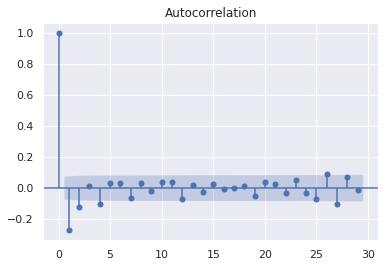

In [120]:
plot_acf(diff(np.log(train)))
plt.show()

MA(1) has a significant spike at Lag 1

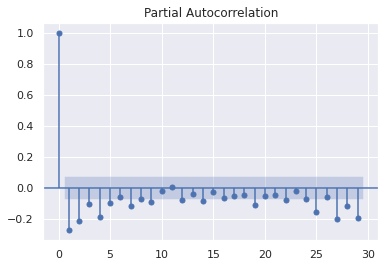

In [122]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff(np.log(train)))
plt.show()

AR(1) has a significant spike at Lag 1
AR(2) has a significant spike at lag 1 and 2

In [112]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = ARIMA(train, order=(1, 1, 1)).fit()

forecasts = arima_model.predict(start='2012-11-01', end='2012-12-31')

In [84]:
MAPE(test, forecasts)

100.05538249464611

In [117]:

arima_model = SARIMAX(train, order=(2, 3, 2), seasonal_order=(1, 0, 0, 31)).fit()

forecasts = arima_model.predict(start='2012-11-01', end='2012-12-31')

/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [118]:
MAPE(test, forecasts)

75.55754202252606